In [3]:
#Import Necessary Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Generate synthetic clustered data
x,y = make_blobs(n_samples = 1000, centers = 3, n_features = 2, random_state = 23)

In [7]:
#To check the number of row's and column's
x.shape

(1000, 2)

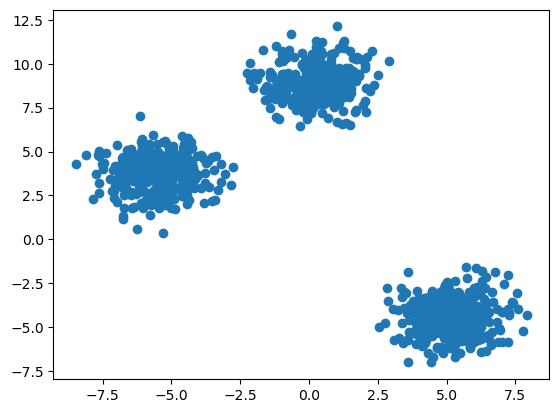

In [9]:
#Visualize data points using scatter plot
plt.scatter(x[:,0], x[:,1])
plt.show()

In [11]:
#Split data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 23)

In [13]:
#Install clustering library dependency
!pip install cluster

In [14]:
#Import KMeans clustering algorithm
from sklearn.cluster import KMeans

In [17]:
#Manual Process
#Select the K value using elbow method
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)

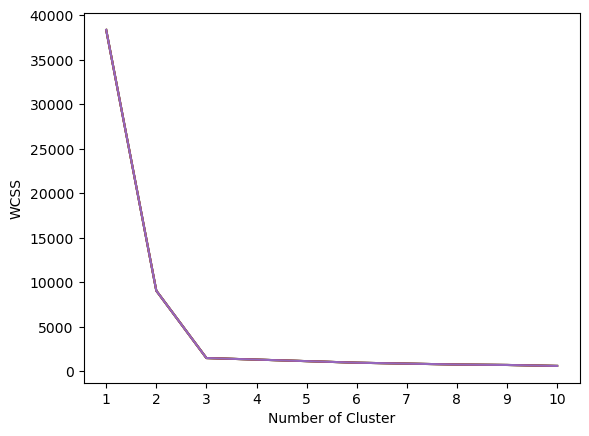

In [27]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")
plt.show()

In [31]:
#Initialize KMeans clustering model
Kmeans = KMeans(n_clusters = 3, init = "k-means++")

In [45]:
#Fit model and predict clusters
y_labels = Kmeans.fit_predict(x_train)

In [51]:
# Predict clusters for test data
y_test_labels = kmeans.predict(x_test)

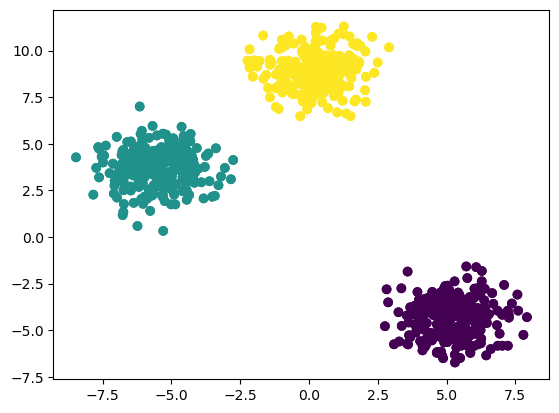

In [49]:
#Plot clustered training data
plt.scatter(x_train[:,0], x_train[:,1], c = y_labels)
plt.show()

In [93]:
#Compute silhouette scores for clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(
        n_clusters=k,
        init='k-means++',
        n_init=10,
        random_state=42
    )
    kmeans.fit(x_train)   # FIX: fit the correct object
    score = silhouette_score(x_train, kmeans.labels_)
    silhouette_coefficients.append(score)

silhouette_coefficients

[0.7234317288325904,
 0.8035082185887608,
 0.6322321632045658,
 0.4785861365915585,
 0.3367993288077044,
 0.33925350151361316,
 0.3357700591500949,
 0.3463226059401902,
 0.34530626092678707]